We need to first get a better understanding of our audio data. Here we will look at some key concepts and features of audio data.

Let's think about the digital representation of analog sound. How does sound get recorded anyway?! Just like with images we need to take our physical world and convert it to numbers or a digital representation for a computer to understand. For audio, a microphone is used to capture the sound and then its converted from analog sound to digital sound by sampling at consistent intervals of time. This is called the `sample rate`. The higher the `sample rate` the higher the quality of the sound however after a certain point the difference is not able to be detected by the human ear. The average sound sample rate is 48 kHz or 48,000 samples per second. This dataset was sampled at 16kHz so our sample rate is 16,000.

When the audio is sampled its sampling the `frequency` or the pitch of the sound and the `amplitude` or how loud the audio is. We can then take our sample rate and frequency and represent the signal visually. This signal can be represented as a `waveform` which is the `signal` representation over time in a graphical format. The audio can be recorded in different `channels`. For example stereo recording have 2 channels, right and left.

Now that we understand a bit about how we get our audio file. Lets take a moment to understand how we might want to parse out a file. For example if you have longer audio files you may want to split it out into `frames` or sections of the audio to be classified individually. For this dataset we dont need to set any frames of our audio samples as each sample is only one second and one word. Another processing step might be an `offset` which means the number of frames from the start of the file to begin data loading.


## Getting setup with TorchAudio

TorchAudio is a library that is part of the PyTorch ecosystem that has I/O functionality, popular open datasets and common audio transformations that we will need to build our model. We will use this library to work with our audio data.

Lets get started! First we will import the packages needed:

In [1]:
# import the packages
import os
import torchaudio
import IPython.display as ipd
import matplotlib.pyplot as plt

C:\Users\cassieb\Anaconda3\envs\pytorchaudio\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


## Get the Speech Commands Dataset

PyTorch has a variety of datasets built in which is super helpful when trying to learn and play around with different audio models. We will use one of these datasets called the [Speech Commands](https://pytorch.org/audio/stable/datasets.html#speechcommands). We will download the full dataset but we are going to only use the `yes` and `no` classes to create a binary classification model. 

### Create folder for data if it doesnt already exist

In [3]:
default_dir = os.getcwd()
folder = 'data'
print(f'Data directory will be: {default_dir}/{folder}')

if os.path.isdir(folder):
    print("Data folder exists.")
else:
    print("Creating folder.")
    os.mkdir(folder) 

Data directory will be: /home/user/notebooks/data
Creating folder.


### Download the dataset to the folder created

In [4]:
trainset_speechcommands = torchaudio.datasets.SPEECHCOMMANDS(f'./{folder}/', download=True)


### Visualize the classes available in the dataset

In [5]:
os.chdir(f'./{folder}/SpeechCommands/speech_commands_v0.02/')
labels = [name for name in os.listdir('.') if os.path.isdir(name)]
# back to default directory
os.chdir(default_dir)
print(f'Total Labels: {len(labels)}')
print(f'Label Names: {labels}')

Total Labels: 36
Label Names: ['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']


## Sound to Tensor

You likely have used a wave file before and understand that this is one format in which we save our digital representation of our analog audio to be shared and played. The Speech Commands dataset that we are using for this tutorial is stored in wave files that are all one second or less.

Lets load up one of the wave files and take a look at how the tensors for the `waveform` looks. We are loading the files using `torchaudio.load` which loads an audio file into a torch.Tensor object. TorchAudio has abstracted the load functions for different audio backends meaning you don't have to worry about the implentation. The `torch.load` function returns the waveform as a tensor and an int of the `sample_rate`. Check out more on the about [load on the PyTorch docs](https://pytorch.org/audio/stable/backend.html#load).


In [7]:
filename = "./data/SpeechCommands/speech_commands_v0.02/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3)
print(f'waveform tensor:{waveform}')
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3, offset =2)
print(waveform)
waveform, sample_rate = torchaudio.load(filepath=filename)
print(waveform)

waveform tensor:tensor([[0.0005, 0.0007, 0.0005]])
tensor([[0.0005, 0.0004, 0.0007]])
tensor([[0.0005, 0.0007, 0.0005,  ..., 0.0008, 0.0008, 0.0007]])


## Plot Waveform

Below we will create a `plot_audio` function to display the waveform and listen to a sample of each class.

In [31]:
def plot_audio(filename):
    waveform, sample_rate = torchaudio.load(filename)

    print("Shape of waveform: {}".format(waveform.size()))
    print("Sample rate of waveform: {}".format(sample_rate))

    plt.figure()
    plt.plot(waveform.t().numpy())

    return waveform, sample_rate

Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


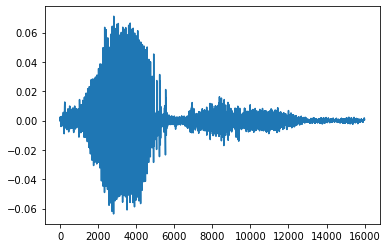

In [32]:
filename = "./data/SpeechCommands/speech_commands_v0.02/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


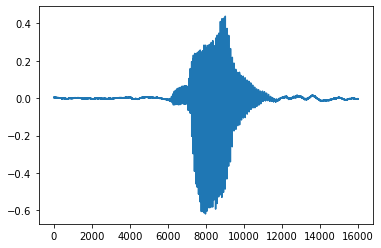

In [34]:
filename = "./data/SpeechCommands/speech_commands_v0.02/no/0b40aa8e_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)